C:\Users\carnotli\AppData\Local\Temp\ipykernel_31376\1884501753.py:73: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(f)


[1 2 1 2]
[0 0 1 1]
[1 2 1 2]
[1 1 5 5]
[1 2 1 2]
[ 5  5 10 10]
[1 2 1 2]
[10 10 15 15]
[1 2 1 2]
[15 15 20 20]
[1 2 1 2]
[20 20 30 30]
[1 2 1 2]
[30 30 50 50]
[1 2 1 2]
[50 50 70 70]
[1 2 1 2]
[ 70  70 100 100]
[2 5 2 5]
[0 0 1 1]
[2 5 2 5]
[1 1 5 5]
[2 5 2 5]
[ 5  5 10 10]
[2 5 2 5]
[10 10 15 15]
[2 5 2 5]
[15 15 20 20]
[2 5 2 5]
[20 20 30 30]
[2 5 2 5]
[30 30 50 50]
[2 5 2 5]
[50 50 70 70]
[2 5 2 5]
[ 70  70 100 100]
[ 5 10  5 10]
[0 0 1 1]
[ 5 10  5 10]
[1 1 5 5]
[ 5 10  5 10]
[ 5  5 10 10]
[ 5 10  5 10]
[10 10 15 15]
[ 5 10  5 10]
[15 15 20 20]
[ 5 10  5 10]
[20 20 30 30]
[ 5 10  5 10]
[30 30 50 50]
[ 5 10  5 10]
[50 50 70 70]
[ 5 10  5 10]
[ 70  70 100 100]
[10 20 10 20]
[0 0 1 1]
[10 20 10 20]
[1 1 5 5]
[10 20 10 20]
[ 5  5 10 10]
[10 20 10 20]
[10 10 15 15]
[10 20 10 20]
[15 15 20 20]
[10 20 10 20]
[20 20 30 30]
[10 20 10 20]
[30 30 50 50]
[10 20 10 20]
[50 50 70 70]
[10 20 10 20]
[ 70  70 100 100]
[20 50 20 50]
[0 0 1 1]
[20 50 20 50]
[1 1 5 5]
[20 50 20 50]
[ 5  5 10 10]
[20 

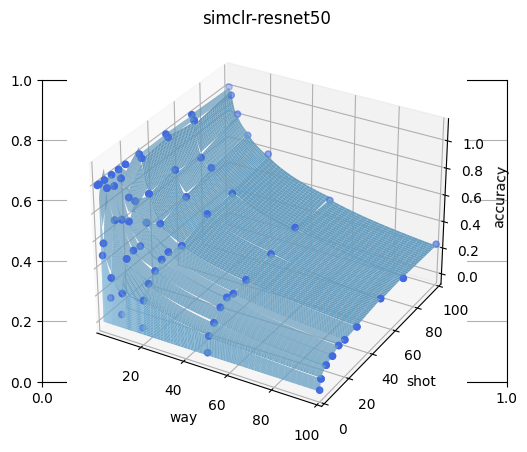

In [82]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import numpy, scipy, scipy.optimize
import matplotlib



def func(data, a, alpha, beta):
    t = data[0]
    p_p = data[1]
    return a * (t**alpha) * (p_p**beta)

def SurfacePlot(func, data, fittedParameters, model_name):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)

    matplotlib.pyplot.grid(True)
    axes = Axes3D(f)

    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 200)
    yModel = numpy.linspace(min(y_data), max(y_data), 200)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow', linewidth=1, antialiased=True)

    axes.scatter(x_data, y_data, z_data) # show data along with plotted surface

    axes.set_title(model_name) # add a title for surface plot
    axes.set_zlabel('accuracy') # Z axis data label
    axes.set_xlabel("way")
    axes.set_ylabel("shot")
    axes.set_xlim(min(x_data), max(x_data))
    axes.set_ylim(min(y_data), max(y_data))
    plt.show()


data = {}
model_name = "simclr-resnet50"
way_list = [1, 2, 5, 10, 20,50,100 ]
shot_list = [0, 1, 5, 10, 15, 20, 30, 50, 70, 100]

with open("0410") as f:
   for line in f:
        tokens = line.split(' ')
        model = tokens[0]
        ws = tokens[1]
        acc = tokens[2]
        if model == model_name:
            if ws not in data:
                data[ws] = {}
            data[ws][model] = acc

for way in way_list:
    data[f"{way}way-0shot"] = {} 
    data[f"{way}way-0shot"][model_name] = 1.0/way

for shot in shot_list:
    data[f"1way-{shot}shot"] = {}
    data[f"1way-{shot}shot"][model_name] = 1.0




f = plt.figure( dpi=100)
matplotlib.pyplot.grid(True)
axes = Axes3D(f)
for i in range(1, len(way_list)):
    for j in range(1, len(shot_list)):
        x_data = np.array([way_list[i-1], way_list[i], way_list[i-1], way_list[i]])
        y_data = np.array([shot_list[j-1], shot_list[j-1],shot_list[j], shot_list[j]])
        z_data = np.array([
            float(data[f"{way_list[i-1]}way-{shot_list[j-1]}shot"][model_name]),
            float(data[f"{way_list[i]}way-{shot_list[j-1]}shot"][model_name]),
            float(data[f"{way_list[i-1]}way-{shot_list[j]}shot"][model_name]),
            float(data[f"{way_list[i]}way-{shot_list[j]}shot"][model_name]),
        ])

        fittedParameters, pcov = scipy.optimize.curve_fit(func, [x_data, y_data], z_data, p0 = [1.0, 1.0, 1.0])

        xModel = numpy.linspace(min(x_data), max(x_data), 20)
        yModel = numpy.linspace(min(y_data), max(y_data), 20)
        X, Y = numpy.meshgrid(xModel, yModel)

        print(x_data)
        print(y_data)

        Z = func(numpy.array([X, Y]), *fittedParameters)

        axes.plot_surface(X, Y, Z, rstride=1, cstride=1, color=[0.53,0.8078,0.9804], linewidth=1, antialiased=True)
        axes.scatter(x_data, y_data, z_data, color = [.2549,.4118,.8824]) # show data along with plotted surface

axes.set_title(model_name) # add a title for surface plot
axes.set_zlabel('accuracy') # Z axis data label
axes.set_xlabel("way")
axes.set_ylabel("shot")
axes.set_xlim(1,max( way_list))
axes.set_ylim(0, max(shot_list))
plt.show()




In [161]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

a1 = np.random.normal(8, 16, 60000)
a2 = np.random.normal(3, 64, 60000)
a3 = [(v-3)/8 * 4 + 8 for v in a2]

a = [a1, a2, a3]

df = pd.DataFrame(np.array(a))
print(df.mean().to_list())
print(df.var().to_list())
print(df.std().to_list())

[-8.57939065033872, -4.600664503156271, -5.274924680849673, -83.67789454911346, -11.608081779410972, -55.13958252906533, 12.153460853463699, 62.290335727753785, -46.350809082213516, 1.4830536337790097, -38.684357550377236, 5.734764293174787, 26.408843173537335, -10.484077702702907, -15.533786996229987, -6.400302780857767, 61.442077885784585, 45.48621280679503, -27.418313576126632, 16.397746401432606, 13.667515594969105, -61.03976392761734, 7.961675532883802, -0.37309500205566276, -56.38538096483023, -14.730881883538949, -10.354743449724719, -19.937527286763714, 40.761414043475064, 22.989062741657637, 3.888200169938257, 11.902182466562872, 38.17095959514936, -33.81175171491682, -73.10654007876401, 8.53462683831208, 54.11266105645344, -6.480744952718839, -2.036933944504241, 91.07504323811197, 90.42445481172872, -103.78144410495952, 60.88057080282326, 11.155284060903577, -12.041686168460842, 34.65020594937501, 45.82965906605612, -10.213487174131709, -5.016744860011246, 41.5242591433475, 1

In [155]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

a1 = np.random.normal(0, 1, 6000000)
a2 = np.random.uniform(0, 1,6000000)
a3 = [i for i in range(6000000)]
a = [a1, a2, a3]
df = pd.DataFrame(np.array(a))
res = df.mean(axis=1).to_list()
res2 = df.var(axis=1).to_list()
res3 = df.std(axis=1).to_list()
res4 = df.skew(axis=1).tolist() # >0 position pinatai, (left-shift) ; =0 yes!
res5 = df.kurtosis(axis=1).to_list()# > 0 sharper; =0 yes!
print(res)
print(res2)
print(res3)
print(res4)
print(res5)








[6.0101134348904254e-05, 0.4998339670133919, 2999999.5]
[0.9991525932496422, 0.08339544423192184, 3000000500000.0]
[0.9995762068244933, 0.28878269378881044, 1732050.9519064387]
[-0.0009206688661986069, 0.001329950553261625, -8.502447500438456e-17]
[6.090966697724909e-05, -1.2011374677991362, -1.1999999999999997]


In [157]:
# print(stats.normaltest(a, axis = 0))
# print(stats.normaltest(a2))# when stat is close to 1.0 and pValue>0.05
# print(stats.normaltest(a3))

In [158]:
stat, p = stats.shapiro(a)
z = list(stats.shapiro(a))
print(z)
print(stat, p)# when stat is close to 1.0 and pValue>0.05 in the case where  n <= 5000
print(stats.shapiro(a1))


[0.6736018061637878, 0.0]
0.6736018061637878 0.0
ShapiroResult(statistic=1.0071932077407837, pvalue=1.0)


In [132]:
print(stats.anderson(a1))
print(stats.anderson(a2))
print(stats.anderson(a3))

AndersonResult(statistic=0.31441900692880154, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=66816.44409622252, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=66716.27167087607, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


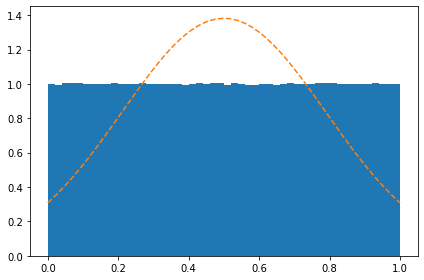

In [134]:
# example data
mu = res[1]  # mean of distribution
sigma = res3[1]  # standard deviation of distribution

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(a2, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')


# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

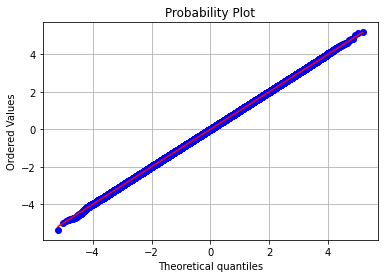

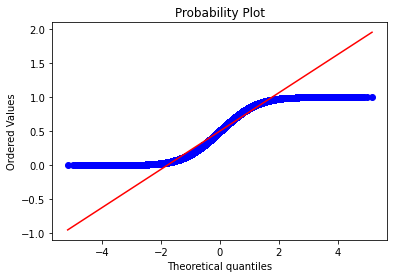

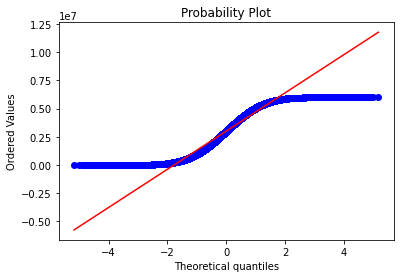

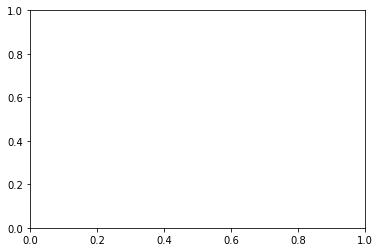

In [140]:
stats.probplot(a1, dist="norm", plot=plt)
plt.grid(True)
plt.show()
plt.cla()
stats.probplot(a2, dist="norm", plot=plt)
plt.show()
plt.cla()
stats.probplot(a3, dist="norm", plot=plt)
plt.show()
plt.cla()